In [ ]:
import pandas as pd

In [ ]:
#Reading the file
df = pd.read_excel('/content/drive/MyDrive/SC Project/Data Set SCC_15th Oct 2023.xlsx')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,Company,year,Prowess_company_code,Industry_type,NIC_Code,Ownership_Group,Num_of_supplier,Num_of_supp_countries,Num_of_product,Num_of_plant,Num_of customers,SCC1,SCC2,SCC3,SCC4,SCC5,SCC6
0,A B B India Ltd.,2012,21420,Machinery,28199,Asea Brown Boveri (F) Group,6,2,8,5,85,14,14,13,13,20,20
1,A B B India Ltd.,2013,21420,Machinery,28199,Asea Brown Boveri (F) Group,6,2,8,7,85,14,14,13,13,21,21
2,A B B India Ltd.,2014,21420,Machinery,28199,Asea Brown Boveri (F) Group,5,2,8,7,54,14,13,13,13,21,21
3,A B B India Ltd.,2015,21420,Machinery,28199,Asea Brown Boveri (F) Group,5,2,8,7,100,13,13,12,12,21,21
4,A B B India Ltd.,2016,21420,Machinery,28199,Asea Brown Boveri (F) Group,6,4,8,7,102,15,15,14,14,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,Zodiac Clothing Co. Ltd.,2012,275551,Textiles,1410,Zodiac Group,3,2,5,3,4,10,11,9,10,15,16
2798,Zodiac Clothing Co. Ltd.,2013,275551,Textiles,1410,Zodiac Group,3,2,5,3,4,10,10,10,10,15,16
2799,Zodiac Clothing Co. Ltd.,2014,275551,Textiles,1410,Zodiac Group,5,2,5,3,4,11,11,10,10,16,18
2800,Zodiac Clothing Co. Ltd.,2015,275551,Textiles,1410,Zodiac Group,4,1,5,3,4,8,8,8,8,12,14


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-67-b1b107baa4fa>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot=sns.heatmap(df.corr(), annot=True, linewidths=1, vmin=-1, vmax=1)


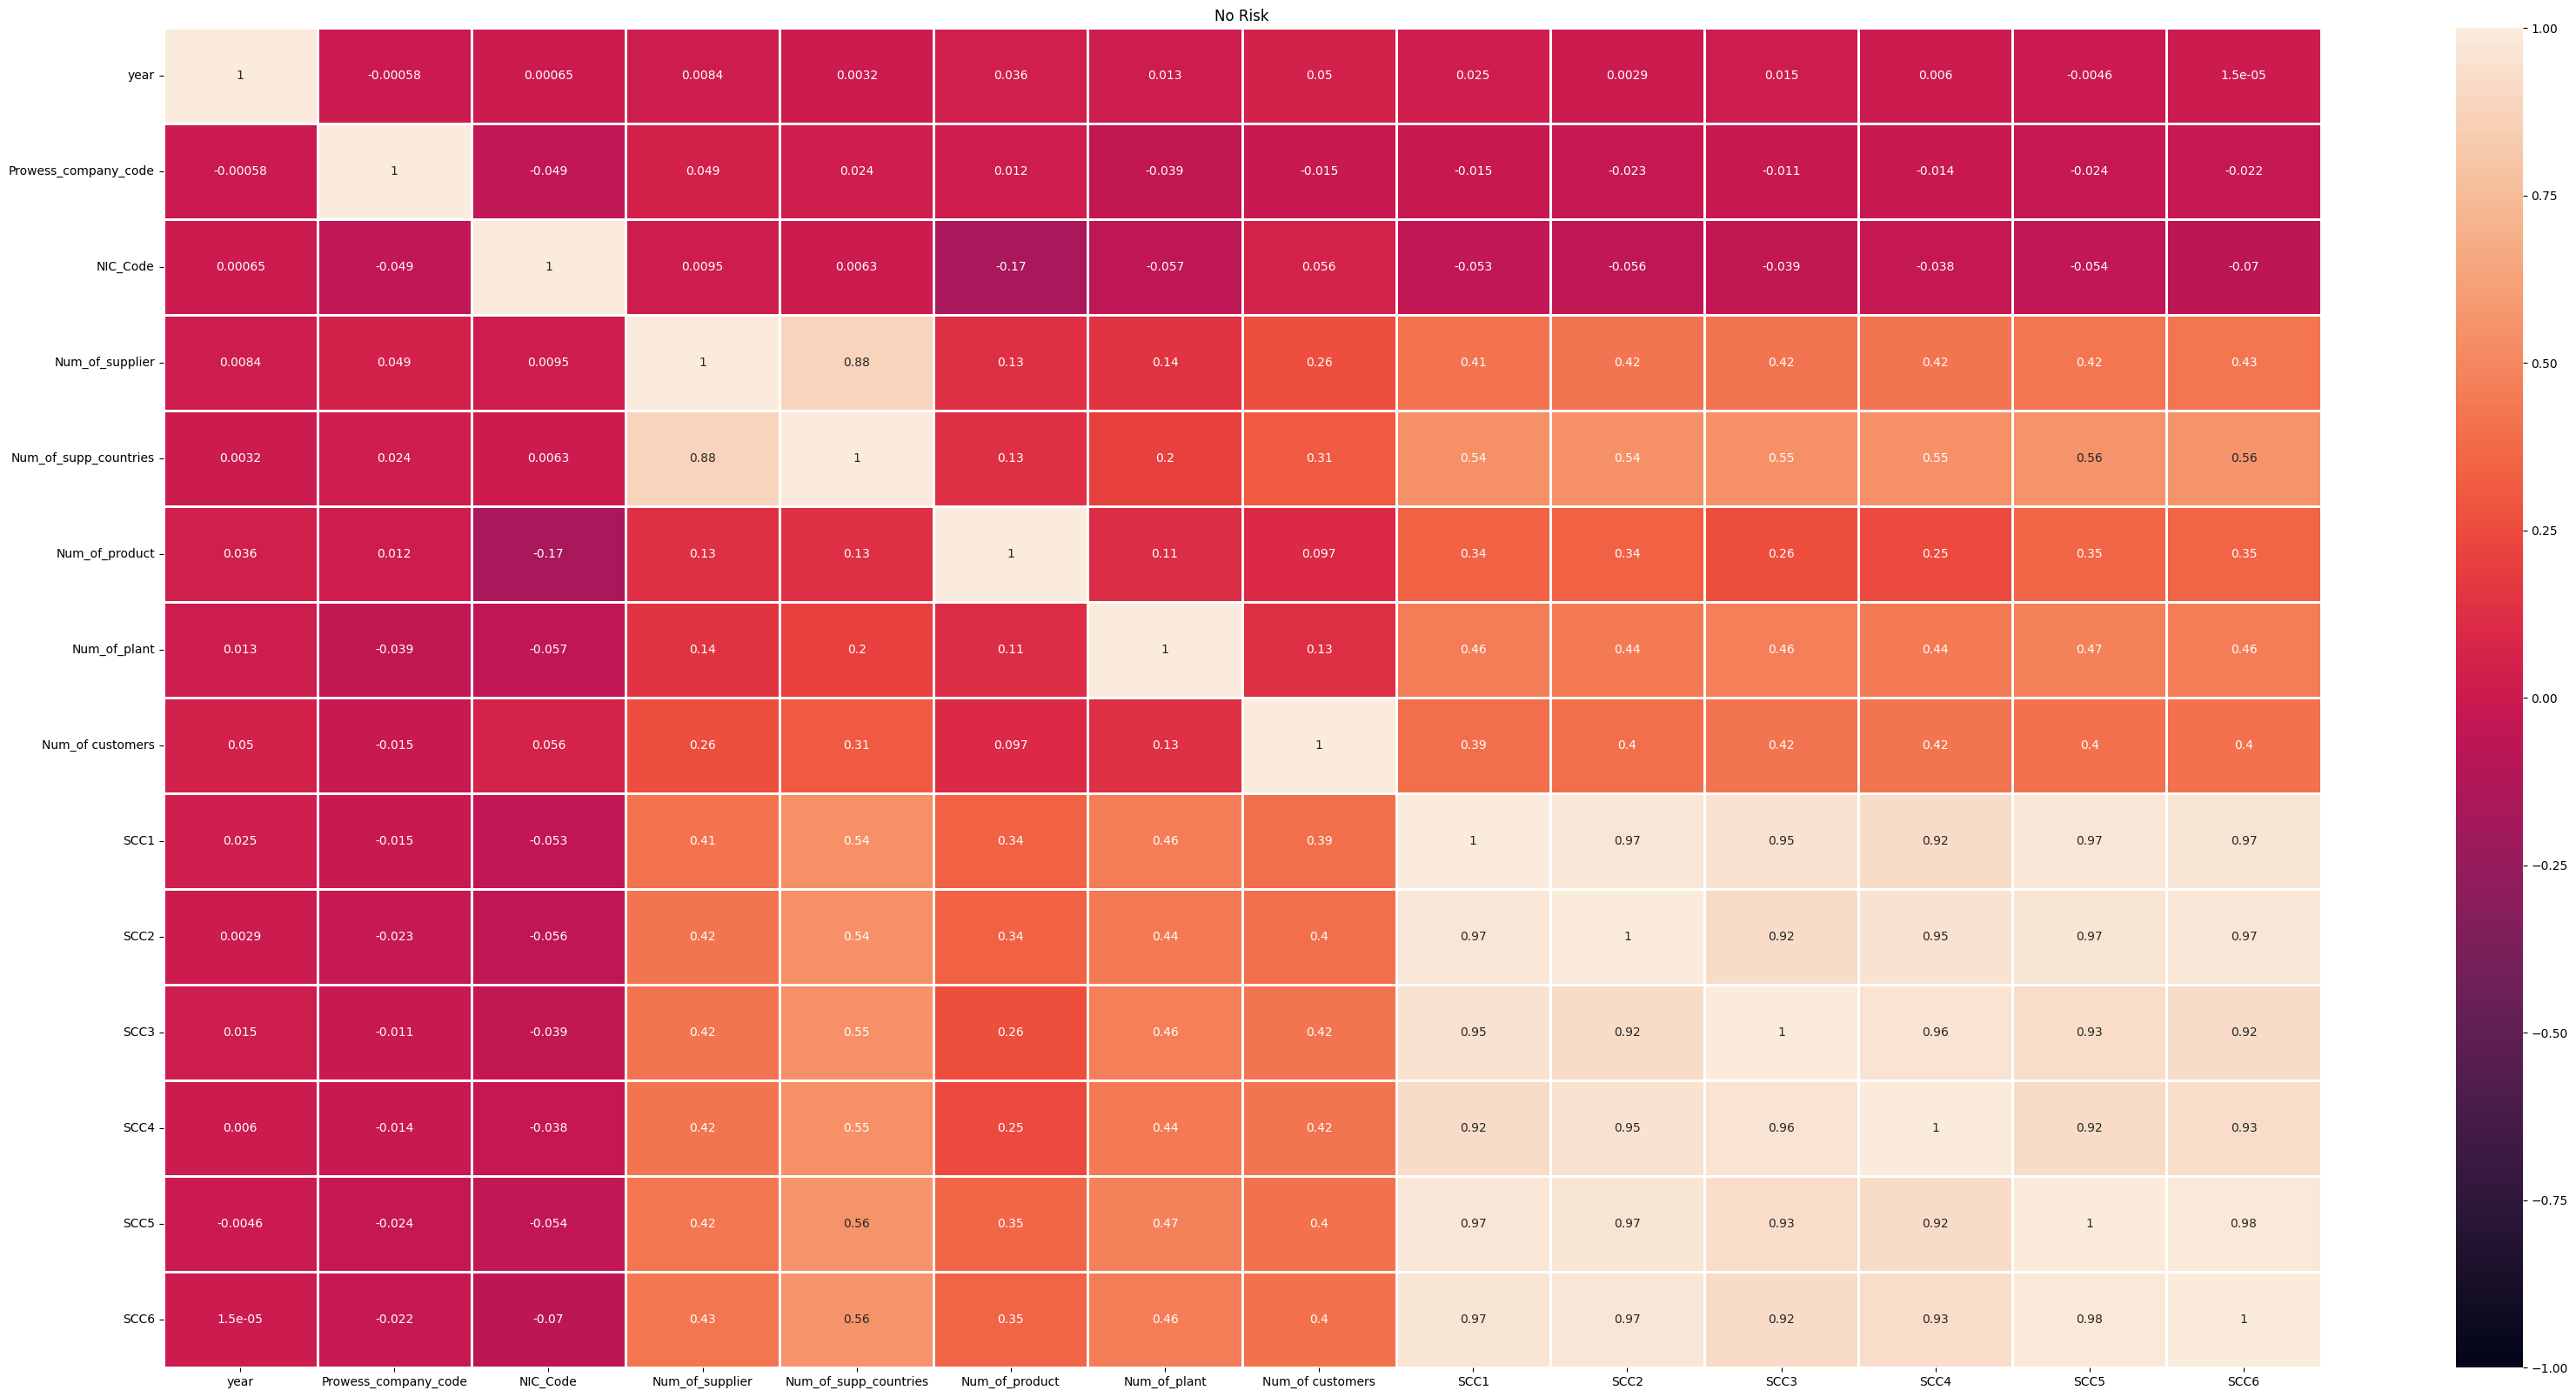

In [ ]:
# plotting correlation heatmap
plt.figure(figsize = (40,20))
dataplot=sns.heatmap(df.corr(), annot=True, linewidths=1, vmin=-1, vmax=1)
dataplot.set_title('No Risk')
# displaying heatmap
plt.show()

Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
import pandas as pd

In [ ]:
df.drop(columns=['Company', 'Industry_type','Ownership_Group'], inplace=True)

In [ ]:
df

,year,Prowess_company_code,NIC_Code,Num_of_supplier,Num_of_supp_countries,Num_of_product,Num_of_plant,Num_of customers,SCC1,SCC2,SCC3,SCC4,SCC5,SCC6
0,2012,21420,28199,6,2,8,5,85,14,14,13,13,20,20
1,2013,21420,28199,6,2,8,7,85,14,14,13,13,21,21
2,2014,21420,28199,5,2,8,7,54,14,13,13,13,21,21
3,2015,21420,28199,5,2,8,7,100,13,13,12,12,21,21
4,2016,21420,28199,6,4,8,7,102,15,15,14,14,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,2012,275551,1410,3,2,5,3,4,10,11,9,10,15,16
2798,2013,275551,1410,3,2,5,3,4,10,10,10,10,15,16
2799,2014,275551,1410,5,2,5,3,4,11,11,10,10,16,18
2800,2015,275551,1410,4,1,5,3,4,8,8,8,8,12,14


In [ ]:
random_state = np.random.RandomState(42)
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)

model.fit(df[['SCC1','SCC2','SCC3','SCC4','SCC5','SCC6']])

print(model.get_params())

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7A209269FD40, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
df['scores_scc'] = model.decision_function(df[['SCC1','SCC2','SCC3','SCC4','SCC5','SCC6']])

df['anomaly_score_scc'] = model.predict(df[['SCC1','SCC2','SCC3','SCC4','SCC5','SCC6']])

df[df['scores_scc']<-0.1]

,year,Prowess_company_code,NIC_Code,Num_of_supplier,Num_of_supp_countries,Num_of_product,Num_of_plant,Num_of customers,SCC1,SCC2,SCC3,SCC4,SCC5,SCC6,scores_scc,anomaly_score_scc
123,2015,11599,13131,7,5,15,9,27,15,15,13,13,24,24,-0.118859,-1
124,2016,11599,13131,7,5,20,9,29,15,15,13,13,24,24,-0.118859,-1
210,2012,22104,29102,64,10,8,6,11,15,15,15,15,22,22,-0.129641,-1
211,2013,22104,29102,66,10,8,6,14,15,15,15,15,23,22,-0.117485,-1
212,2014,22104,29102,61,10,8,6,14,15,15,15,15,23,22,-0.117485,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,2016,216946,2420,24,5,11,9,10,15,15,14,14,24,24,-0.103198,-1
2696,2016,374456,29301,8,3,10,6,11,15,13,15,13,22,21,-0.100263,-1
2752,2012,272854,21002,11,4,11,5,17,15,15,15,15,24,24,-0.101793,-1
2753,2013,272854,21002,10,4,11,5,8,15,15,15,15,23,23,-0.109725,-1


In [ ]:
df.columns

Index(['year', 'Prowess_company_code', 'NIC_Code', 'Num_of_supplier',
       'Num_of_supp_countries', 'Num_of_product', 'Num_of_plant',
       'Num_of customers', 'SCC1', 'SCC2', 'SCC3', 'SCC4', 'SCC5', 'SCC6',
       'scores_scc', 'anomaly_score_scc'],
      dtype='object')

In [ ]:
random_state = np.random.RandomState(42)
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)

model.fit(df[['Num_of_supplier',
       'Num_of_supp_countries', 'Num_of_product', 'Num_of_plant',
       'Num_of customers']])

print(model.get_params())

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7A209269D940, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
df['scores_pred'] = model.decision_function(df[['Num_of_supplier',
       'Num_of_supp_countries', 'Num_of_product', 'Num_of_plant',
       'Num_of customers']])

df['anomaly_score_pred'] = model.predict(df[['Num_of_supplier',
       'Num_of_supp_countries', 'Num_of_product', 'Num_of_plant',
       'Num_of customers']])

df[df['scores_pred']<-0.1]

,year,Prowess_company_code,NIC_Code,Num_of_supplier,Num_of_supp_countries,Num_of_product,Num_of_plant,Num_of customers,SCC1,SCC2,SCC3,SCC4,SCC5,SCC6,scores_scc,anomaly_score_scc,scores_pred,anomaly_score_pred
0,2012,21420,28199,6,2,8,5,85,14,14,13,13,20,20,-0.038397,-1,-0.115616,-1
1,2013,21420,28199,6,2,8,7,85,14,14,13,13,21,21,-0.022781,-1,-0.128397,-1
3,2015,21420,28199,5,2,8,7,100,13,13,12,12,21,21,0.003260,1,-0.146074,-1
4,2016,21420,28199,6,4,8,7,102,15,15,14,14,23,23,-0.084632,-1,-0.162955,-1
51,2013,369199,2410,14,6,12,1,37,13,13,12,12,21,21,0.003260,1,-0.119753,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566,2016,257429,47736,2,1,2,1,76,7,7,7,7,10,10,0.089410,1,-0.101773,-1
2633,2013,216946,2420,18,5,20,9,7,15,14,13,12,24,24,-0.110671,-1,-0.107557,-1
2635,2015,216946,2420,23,5,18,9,10,15,14,13,12,24,24,-0.110671,-1,-0.117727,-1
2707,2012,271523,24311,16,5,8,4,55,14,13,14,13,23,23,-0.063806,-1,-0.110229,-1


In [ ]:
accuracy = 100*list(df['anomaly_score_scc']).count(-1)/(561)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 100.0


In [ ]:
accuracy = 100*list(df['anomaly_score_pred']).count(-1)/(561)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 100.0


Boruta

In [ ]:
X=df[['year', 'Prowess_company_code', 'NIC_Code', 'Num_of_supplier',
       'Num_of_supp_countries', 'Num_of_product', 'Num_of_plant',
       'Num_of customers']]

In [ ]:
y=df[['SCC1']]

In [ ]:
#isinstance(y,pd.DataFrame)

In [ ]:
#ser1 = df.iloc[:,8]

In [ ]:
#isinstance(ser1,pd.Series)

In [ ]:
!pip install boruta

medium blog


In [ ]:
# important libraries
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
for col in X.columns:
    X[f"shadow_{col}"] = X[col].sample(frac=1).reset_index(drop=True)

<ipython-input-85-0333d68da3f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f"shadow_{col}"] = X[col].sample(frac=1).reset_index(drop=True)
<ipython-input-85-0333d68da3f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f"shadow_{col}"] = X[col].sample(frac=1).reset_index(drop=True)
<ipython-input-85-0333d68da3f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [ ]:
def get_important_features(X, y):
  # Initiliaze Random Forest CLassifier
  rf = RandomForestClassifier(max_depth=20)
  # Fit Random Forest on provided data
  rf.fit(X,y)
  # Create dictionary of feature importances
  importances = {feature_name: f_importance for feature_name, f_importance in zip(X.columns, rf.feature_importances_)}
  # Isolate importances of Shadow features
  only_shadow_feat_importance = {key:value for key,value in importances.items() if "shadow" in key}
  # get importance level of most important shadow feature
  highest_shadow_feature = list(dict(sorted(only_shadow_feat_importance.items(), key=lambda item: item[1], reverse=True)).values())[0]
  # get original feature which fulfill boruta selection criteria
  selected_features = [key for key, value in importances.items() if value > highest_shadow_feature]
  return selected_features

In [ ]:
TRIALS = 50
feature_hits = {i:0 for i in df.columns}
for _ in tqdm(range(TRIALS)):
    imp_features = get_important_features(X, ser1)
    for key, _ in feature_hits.items():
        if key in imp_features: feature_hits[key] += 1
print(feature_hits)

  0%|          | 0/50 [00:00<?, ?it/s]

{'year': 0, 'Prowess_company_code': 50, 'NIC_Code': 50, 'Num_of_supplier': 50, 'Num_of_supp_countries': 50, 'Num_of_product': 50, 'Num_of_plant': 50, 'Num_of customers': 50, 'SCC1': 0, 'SCC2': 0, 'SCC3': 0, 'SCC4': 0, 'SCC5': 0, 'SCC6': 0, 'scores_scc': 0, 'anomaly_score_scc': 0, 'scores_pred': 0, 'anomaly_score_pred': 0}


In [ ]:
# Calculate the probability mass function
pmf = [sp.stats.binom.pmf(x, TRIALS, .5) for x in range(TRIALS + 1)]

In [ ]:
pmf

[8.881784197001254e-16,
 4.4408920985006104e-14,
 1.0880185641326552e-12,
 1.7408297026122506e-11,
 2.0454749005693838e-10,
 1.881836908523833e-09,
 1.4113776813928742e-08,
 8.871516854469495e-08,
 4.768440309277371e-07,
 2.2252721443294427e-06,
 9.123615791750716e-06,
 3.317678469727518e-05,
 0.00010782455026614453,
 0.00031517945462411566,
 0.0008329742729351613,
 0.001999138255044388,
 0.004373114932909585,
 0.008746229865819174,
 0.016034754754001845,
 0.027005902743582028,
 0.04185914925255215,
 0.059798784646503254,
 0.0788256706703904,
 0.09596168603351869,
 0.10795689678770863,
 0.11227517265921712,
 0.10795689678770864,
 0.09596168603351869,
 0.07882567067039037,
 0.05979878464650316,
 0.04185914925255215,
 0.027005902743582055,
 0.016034754754001842,
 0.008746229865819176,
 0.004373114932909585,
 0.0019991382550443885,
 0.0008329742729351612,
 0.00031517945462411566,
 0.00010782455026614453,
 3.317678469727517e-05,
 9.123615791750718e-06,
 2.225272144329443e-06,
 4.7684403092

In [ ]:
# trails_in_green_zone
def get_tail_items(pmf):
  total = 0
  for i, x in enumerate(pmf):
    total += x
    if total >= 0.05:
               break
  return i

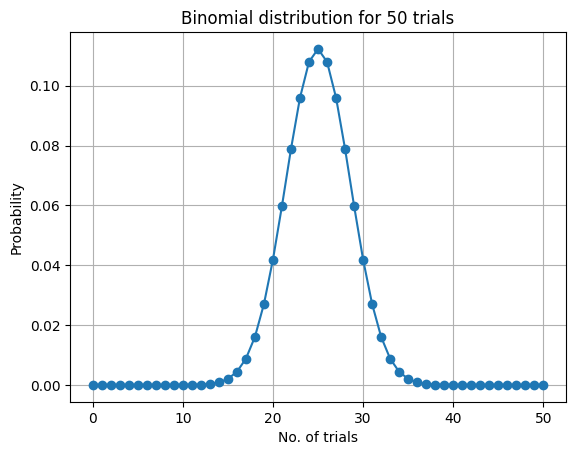

In [ ]:
# plot the binomial distribution
plt.plot([i for i in range(TRIALS + 1)], pmf,"-o")
plt.title(f"Binomial distribution for {TRIALS} trials")
plt.xlabel("No. of trials")
plt.ylabel("Probability")
plt.grid(True)

In [ ]:
# select features from n number of trials
def choose_features(feature_hits, TRIALS, thresh):
    #define boundries
    green_zone_thresh = TRIALS - thresh
    blue_zone_upper = green_zone_thresh
    blue_zone_lower = thresh
    green_zone = [key for key, value in feature_hits.items() if    value >= green_zone_thresh]
    blue_zone = [key for key, value in feature_hits.items() if (value >= blue_zone_lower and value < blue_zone_upper)]
    return green_zone, blue_zone

In [ ]:
thresh = get_tail_items(pmf)
green, blue = choose_features(feature_hits, TRIALS, thresh)
green,blue

(['Prowess_company_code',
  'NIC_Code',
  'Num_of_supplier',
  'Num_of_supp_countries',
  'Num_of_product',
  'Num_of_plant',
  'Num_of customers'],
 [])